<h1> TDR plots for Matthew </h1>

In [1]:
from __future__ import division
import sys
home_dir=!echo "$HOME"
sys.path.insert(2,home_dir[0]+'/iPyNb/NERSC_Import') 
from pyROOT_import import *
from pyNEST import *
import scipy as sp
import scipy.io as sio
import scipy.stats as stats
from scipy.interpolate import interp2d
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 20})

Populating the interactive namespace from numpy and matplotlib


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: LCE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: EField (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: LCE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: EField (Potential memory leak).
`%matplotlib` prevents importing * from pylab and numpy


<h1> Load in the LUX 2013 tiritum yields </h1>

In [2]:
LUXdata=sio.loadmat('data/Tritium_2013_Yields.mat')
#LUXdata.keys()

In [26]:
NEST =NEST_setup(Det='LUX',custom=False)

In [4]:
LUXdata['mean_s1_yield_100_iter1'][-4]=mean(LUXdata['mean_s1_yield_100_iter1'][[-3,-5]])
LUXdata['mean_s1_yield_100_iter1_gl'][-4]=mean(LUXdata['mean_s1_yield_100_iter1_gl'][[-3,-5]])
#LUXdata['mean_s1_yield_100_iter1_gu'][-4]=mean(LUXdata['mean_s1_yield_100_iter1_gu'][[-3,-5]])

In [47]:
def get_lyqy(NEST =NEST_setup(Det='LUX',custom=False), PT=0, eField=1000, Energy = linspace(1,20,50)):
    #NEST=libNEST.NEST(1,10,100,2.888,-1) # 0 is NR, 1 is ER ... Energy, EField(V/cm), density
    NEST.SetParticleType(PT)
    NEST.SetElectricField(eField)
    LY=[]
    QY=[]
    for En in Energy:
        NEST.SetEnergy(En)
        LY_step=[]
        QY_step=[]
        for ii in arange(0,10000,1):
            NEST.DetectorResponse()
            LY_step.append(NEST.GetNumPhotons())
            QY_step.append(NEST.GetNumElectrons())
        LY.append(mean(np.array(LY_step))/En)
        QY.append(mean(np.array(QY_step))/En)
    return(LY,QY)

In [50]:
Energy = linspace(1,19.5,50)
LY_0,QY_0 = get_lyqy(NEST,PT=1, Energy = Energy, eField=0)
LY_105,QY_105 = get_lyqy(NEST,PT=1, Energy = Energy, eField=105)
LY_180,QY_180 = get_lyqy(NEST,PT=1, Energy = Energy, eField=180)
LY_450,QY_450 = get_lyqy(NEST,PT=1, Energy = Energy, eField=450)

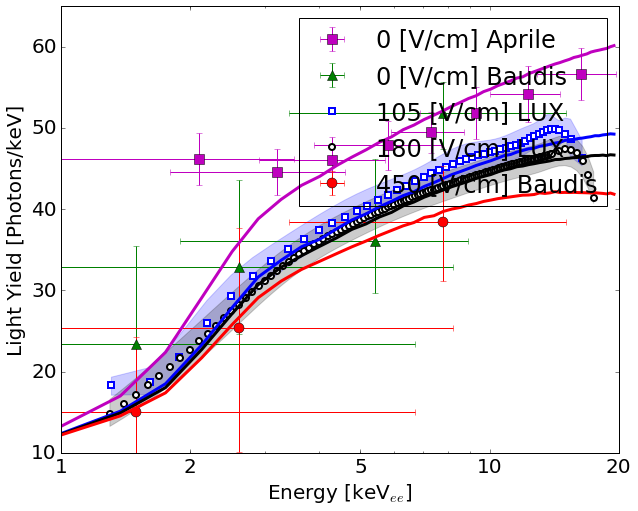

In [68]:
B=LUXdata['Baudis'].T
A=LUXdata['Aprile'][:8].T


x=LUXdata['E_center_s1_yield_iter1'].squeeze()
ly= ip.UnivariateSpline(x,LUXdata['mean_s1_yield_iter1'].squeeze(),s=10)
lyu=ip.UnivariateSpline(x,LUXdata['mean_s1_yield_iter1_gu'].squeeze(),s=10)
lyl=ip.UnivariateSpline(x,LUXdata['mean_s1_yield_iter1_gl'].squeeze(),s=10)


x100=LUXdata['E_center_s1_yield_100_iter1'].squeeze()
ly100= ip.UnivariateSpline(x100,LUXdata['mean_s1_yield_100_iter1'].squeeze(),s=10)
lyu100=ip.UnivariateSpline(x100,LUXdata['mean_s1_yield_100_iter1_gu'].squeeze(),s=10)
lyl100=ip.UnivariateSpline(x100,LUXdata['mean_s1_yield_100_iter1_gl'].squeeze(),s=10)

plt.fill_between(x100,lyl100(x100),lyu100(x100), color='b',alpha=0.2)
h1,=plt.plot(x100,ly100(x100),'sb',markerfacecolor='w',linewidth=2,markersize=6,\
         markeredgewidth=2,markeredgecolor='b',label='105 [V/cm] LUX')

plt.fill_between(x,lyl(x),lyu(x), color='k',alpha=0.2)
h2,=plt.plot(x,ly(x),'ok',markerfacecolor='w',linewidth=2,markersize=6,markeredgewidth=2,label='180 [V/cm] LUX')

kr_norm = 63.2638
B_x=B[0][:-1]
B_x_err=vstack((B_x-B[1][:-1],B[2][:-1]-B_x))
B_y0=B[3][:-1]*kr_norm
B_y0_err=vstack((B[4][:-1]*kr_norm-B_y0,B_y0-B[5][:-1]*kr_norm))

B_x=B[0][:-1]
#B_x400_err=vstack((B_x-B[6][:-1],B[7][:-1]-B_x))
B_y400=B[9][:-1]*kr_norm
B_y400_err=vstack((B[10][:-1]*kr_norm-B_y400,B_y400-B[11][:-1]*kr_norm))

Ax=A[0]
Ax_err=vstack((Ax-A[1],A[2]-Ax))
Ay=A[3]*kr_norm
Ay_err=vstack((A[4]*kr_norm-Ay,Ay-A[5]*kr_norm))


h3=plt.errorbar(Ax,Ay,Ay_err,Ax_err,fmt="sm",markersize=10, label='0 [V/cm] Aprile')
h4=plt.errorbar(B_x,B_y0,B_y0_err,B_x_err,fmt="^g",markersize=10, label='0 [V/cm] Baudis')
h5=plt.errorbar(B_x,B_y400,B_y400_err,B_x_err,fmt="or",markersize=10, label='450 [V/cm] Baudis')


#PLOT NEST

plt.plot(Energy,LY_0,'m',linewidth=3)
plt.plot(Energy,LY_105,'b',linewidth=3)
plt.plot(Energy,LY_180,'k',linewidth=3)
plt.plot(Energy,LY_450,'r',linewidth=3)

legend(handles=[h3,h4, h1,h2, h5], numpoints=1)

xlim([1,20])
ylim([10,65])
xscale('log')

ylabel('Light Yield [Photons/keV]')
xlabel('Energy [keV'+r'$_{ee}$]')

ax=gca()
ax.set_xticks([1,2,5,10,20])
ax.set_xticklabels( ([1,2,5,10,20]) )